<a href="https://colab.research.google.com/github/gameqube963741/data_analysis/blob/master/ds_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pwd

/content


In [2]:
# cd chap3/

In [3]:
import requests, zipfile
from io import StringIO
import io

# 下載資料

In [4]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/00356/student.zip'

r = requests.get(url, stream=True)

z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall()

In [5]:
ls

chap3/        student-mat.csv  student-por.csv
sample_data/  student-merge.R  student.txt


# 讀取資料

In [6]:
import pandas as pd

# 讀取資料
student_data_math = pd.read_csv('student-mat.csv')

# 確認資料

In [7]:
# 確認資料
student_data_math.head()

,school;sex;age;address;famsize;Pstatus;Medu;Fedu;Mjob;Fjob;reason;guardian;traveltime;studytime;failures;schoolsup;famsup;paid;activities;nursery;higher;internet;romantic;famrel;freetime;goout;Dalc;Walc;health;absences;G1;G2;G3
0,"GP;""F"";18;""U"";""GT3"";""A"";4;4;""at_home"";""teacher..."
1,"GP;""F"";17;""U"";""GT3"";""T"";1;1;""at_home"";""other"";..."
2,"GP;""F"";15;""U"";""LE3"";""T"";1;1;""at_home"";""other"";..."
3,"GP;""F"";15;""U"";""GT3"";""T"";4;2;""health"";""services..."
4,"GP;""F"";16;""U"";""GT3"";""T"";3;3;""other"";""other"";""h..."


In [8]:
student_data_math = pd.read_csv('student-mat.csv', sep=';')

In [9]:
student_data_math.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


# 確認資料性質

In [10]:
# 確認資料性質
student_data_math.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [11]:
student_data_math['sex'].head()

0    F
1    F
2    F
3    F
4    F
Name: sex, dtype: object

In [12]:
student_data_math['absences'].head()

0     6
1     4
2    10
3     2
4     4
Name: absences, dtype: int64

# 以性別為基準，取年齡平均

In [13]:
# 以性別為基準，取年齡平均
student_data_math.groupby('sex')['age'].mean()

sex
F    16.730769
M    16.657754
Name: age, dtype: float64

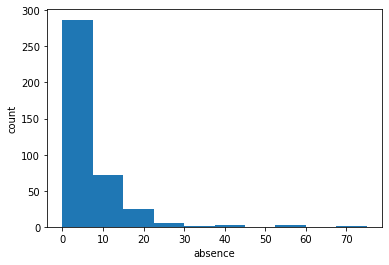

In [14]:
import matplotlib.pyplot as plt

# histagram 
plt.hist(student_data_math['absences'])

plt.xlabel('absence')
plt.ylabel('count')

plt.show()


# ↑由上表可以觀察出，資料呈現右偏態分佈

# 平均值、中位數、眾數（曠課）

In [15]:
# 平均值
student_data_math['absences'].mean()

5.708860759493671

In [16]:
# 中位數
student_data_math['absences'].median()

4.0

In [17]:
# 眾數
student_data_math['absences'].mode()

0    0
dtype: int64

# 變異數、標準差（曠課）

In [18]:
# 變異數
student_data_math['absences'].var(ddof=0)

63.887389841371515

In [19]:
# 標準差
student_data_math['absences'].std(ddof=0)

7.992958766400057

In [20]:
# 四分位距
student_data_math['absences'].describe()[6] - student_data_math['absences'].describe()[4]

8.0

In [21]:
# 摘要統計量
student_data_math.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


# 製作箱型圖

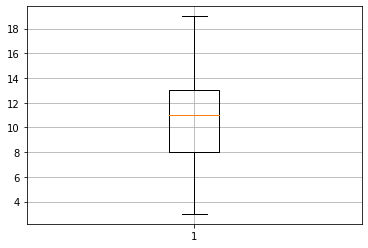

In [22]:
plt.boxplot(student_data_math['G1']) # G1為第一個學期成績
plt.grid(True)

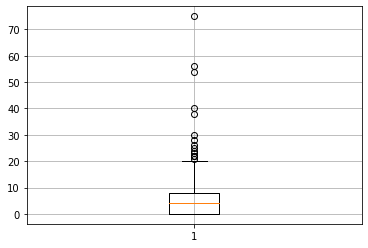

In [23]:
plt.boxplot(student_data_math['absences'])
plt.grid(True)

# 預設去除離群值

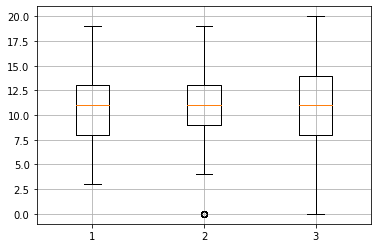

In [24]:
plt.boxplot([student_data_math['G1'], student_data_math['G2'], student_data_math['G3']]) # G1為第一個學期成績
plt.grid(True)

# 變異係數

In [25]:
%precision 3
student_data_math['absences'].std()/student_data_math['absences'].mean()

1.402

# 散佈圖 與 相關係數

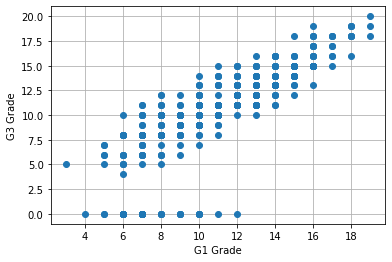

In [26]:
plt.plot(student_data_math['G1'], student_data_math['G3'], 'o')

plt.ylabel('G3 Grade')
plt.xlabel('G1 Grade')
plt.grid(True)

# 共變異數

In [27]:
import numpy as np

%precision 2
# G1、G3共變異數
np.cov(student_data_math['G1'],student_data_math['G3'])

array([[11.02, 12.19],
       [12.19, 20.99]])

In [28]:
import seaborn as sns
sns.set()

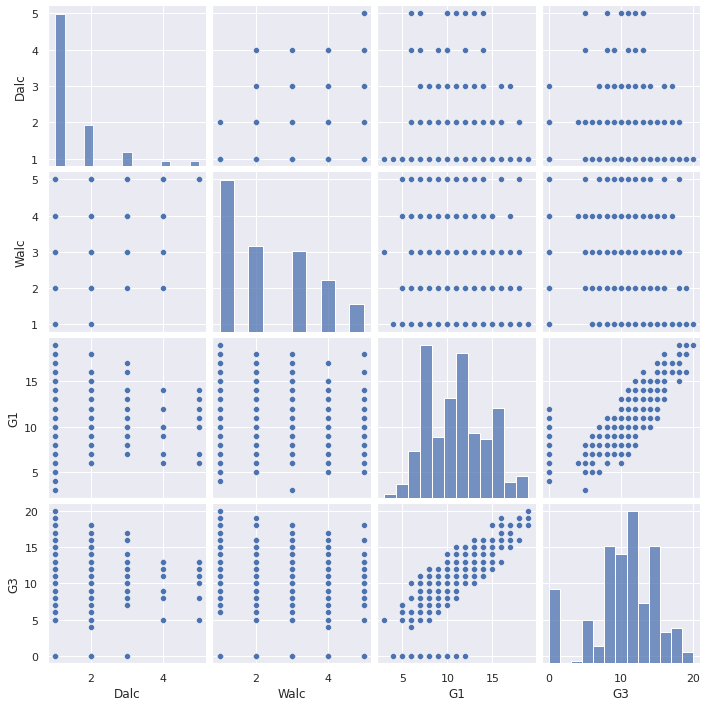

In [29]:
sns.pairplot(student_data_math[['Dalc', 'Walc', 'G1', 'G3']])
plt.grid(True)

# 分析喝酒與學期成績關係

In [30]:
student_data_math.groupby('G1')['Walc'].mean()

G1
3     3.000000
4     1.000000
5     2.285714
6     2.875000
7     2.108108
8     2.317073
9     2.580645
10    2.588235
11    2.179487
12    2.342857
13    2.181818
14    2.133333
15    1.958333
16    2.136364
17    2.000000
18    1.875000
19    1.000000
Name: Walc, dtype: float64

In [31]:
student_data_math.groupby('Walc')['G1'].mean()

Walc
1    11.178808
2    11.270588
3    10.937500
4     9.980392
5     9.964286
Name: G1, dtype: float64

# 結論：
## 發現平常日喝酒的人學期成績表現比較不好但是也沒有特別差，週末不喝酒的同學學期表現較好